In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline
start_time = dt.datetime.now()

In [2]:
card_transactions_data = pd.read_csv('card transactions.csv', dtype=object)
card_transactions_data = card_transactions_data.iloc[:, :-8].copy()

In [4]:
card_transactions_data['Recnum'] = card_transactions_data['Recnum'].astype(int)
card_transactions_data['Fraud'] = card_transactions_data['Fraud'].astype(int)
card_transactions_data['Amount'] = card_transactions_data['Amount'].astype(float)
card_transactions_data['Date'] = pd.to_datetime(card_transactions_data['Date'])

In [6]:
card_transactions_data.dtypes

Recnum                        int32
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int32
dtype: object

In [7]:
numerical_table = card_transactions_data.describe().transpose()
numerical_table

,count,mean,std,min,25%,50%,75%,max
Recnum,96753.0,48377.000000,27930.329635,1.00,24189.00,48377.00,72565.0,96753.00
Amount,96753.0,427.885677,10006.140302,0.01,33.48,137.98,428.2,3102045.53
Fraud,96753.0,0.010945,0.104047,0.00,0.00,0.00,0.0,1.00


In [8]:
(card_transactions_data.Date==0).sum() / len(card_transactions_data.Date) * 100

0.0

In [9]:
(card_transactions_data.Fraud==0).sum() / len(card_transactions_data.Fraud) * 100

98.90546029580479

In [69]:
categorical_table = card_transactions_data.describe(include='all', datetime_is_numeric=True).transpose()
categorical_table

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Recnum,96753.0,NaN,NaN,NaN,48377.0,1.0,24189.0,48377.0,72565.0,96753.0,27930.329635
Cardnum,96753,1645,5142148452,1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,96753,NaN,NaN,NaN,2010-06-25 22:21:52.480232960,2010-01-01 00:00:00,2010-04-03 00:00:00,2010-06-27 00:00:00,2010-09-12 00:00:00,2010-12-31 00:00:00,NaN
Merchnum,93378,13091,930090121224,9310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch description,96753,13126,GSA-FSS-ADV,1688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch state,95558,227,TN,12035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch zip,92097,4567,38118,11868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transtype,96753,4,P,96398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,96753.0,NaN,NaN,NaN,427.885677,0.01,33.48,137.98,428.2,3102045.53,10006.140302
Fraud,96753.0,NaN,NaN,NaN,0.010945,0.0,0.0,0.0,0.0,1.0,0.104047


In [62]:
# % Population
card_transactions_data.notna().mean()

Recnum               1.000000
Cardnum              1.000000
Date                 1.000000
Merchnum             0.965117
Merch description    1.000000
Merch state          0.987649
Merch zip            0.951877
Transtype            1.000000
Amount               1.000000
Fraud                1.000000
dtype: float64

In [71]:
# % Zero
card_transactions_data.apply(lambda value: value==0).mean()

Recnum               0.000000
Cardnum              0.000000
Date                 0.000000
Merchnum             0.000000
Merch description    0.000000
Merch state          0.000000
Merch zip            0.000000
Transtype            0.000000
Amount               0.000000
Fraud                0.989055
dtype: float64

Text(0, 0.5, 'Count')

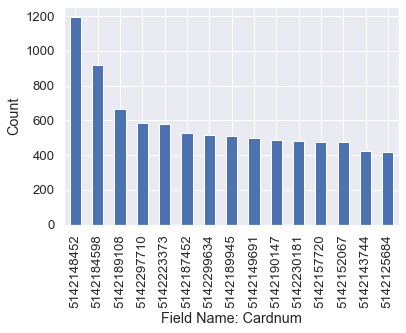

In [81]:
sns.set(font_scale=1.2)
card_transactions_data['Cardnum'].value_counts().head(15).plot(kind = 'bar')
# plt.yscale('linear')
plt.xlabel('Field Name: Cardnum')
plt.ylabel('Count')

In [79]:
(card_transactions_data['Cardnum']=="5142148452").sum() / len(card_transactions_data['Cardnum'])

0.01232003142021436

Text(0, 0.5, 'Count')

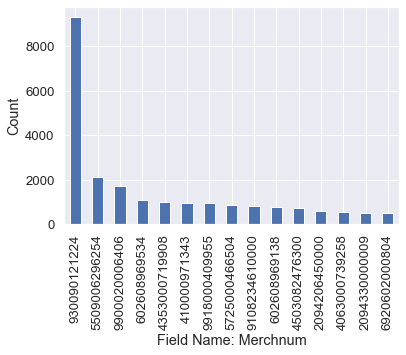

In [84]:
sns.set(font_scale=1.2)
card_transactions_data['Merchnum'].value_counts().head(15).plot(kind = 'bar')
# plt.yscale('log')
plt.xlabel('Field Name: Merchnum')
plt.ylabel('Count')

In [82]:
(card_transactions_data['Merchnum']=="930090121224").sum() / len(card_transactions_data['Merchnum'])

0.09622440647835209

Text(0, 0.5, 'Count')

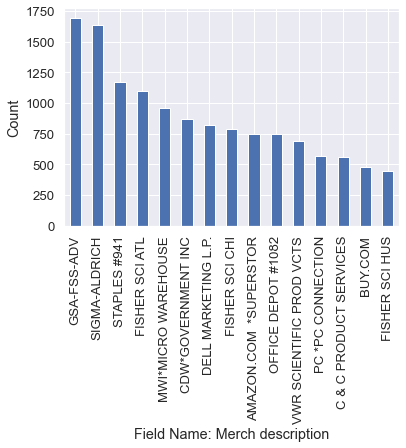

In [85]:
sns.set(font_scale=1.2)
card_transactions_data['Merch description'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Field Name: Merch description')
plt.ylabel('Count')

In [86]:
(card_transactions_data['Merch description']=="GSA-FSS-ADV").sum() / len(card_transactions_data['Merch description'])

0.01744648744741765

Text(0, 0.5, 'Count')

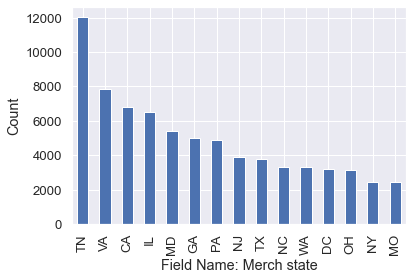

In [87]:
sns.set(font_scale=1.2)
card_transactions_data['Merch state'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Field Name: Merch state')
plt.ylabel('Count')

In [88]:
(card_transactions_data['Merch state']=="TN").sum() / len(card_transactions_data['Merch state'])

0.12438890783748308

Text(0, 0.5, 'Count')

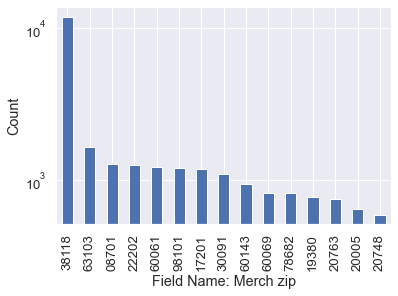

In [90]:
sns.set(font_scale=1.2)
card_transactions_data['Merch zip'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('Field Name: Merch zip')
plt.ylabel('Count')

In [91]:
(card_transactions_data['Merch zip']=="38118").sum() / len(card_transactions_data['Merch zip'])

0.12266286316703358

Text(0, 0.5, 'Count')

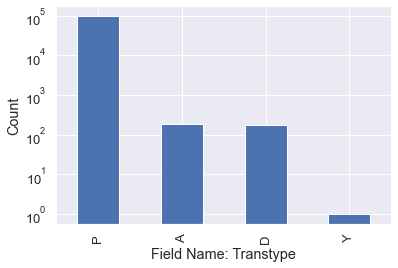

In [95]:
sns.set(font_scale=1.2)
card_transactions_data['Transtype'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('Field Name: Transtype')
plt.ylabel('Count')

In [96]:
(card_transactions_data['Transtype']=="P").sum() / len(card_transactions_data['Transtype'])

0.9963308631256912

Text(0, 0.5, 'Count')

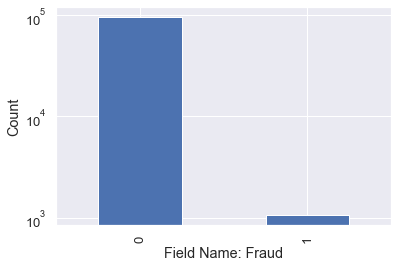

In [10]:
sns.set(font_scale=1.2)
card_transactions_data['Fraud'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('Field Name: Fraud')
plt.ylabel('Count')

In [12]:
numrecords = len(card_transactions_data)
daily_applications = card_transactions_data.set_index(card_transactions_data['Date']).resample(dt.timedelta(days = 1)).count().iloc[:,0]
daily_applications

Date
2010-01-01     51
2010-01-02     29
2010-01-03    159
2010-01-04    229
2010-01-05    309
             ... 
2010-12-27    199
2010-12-28    216
2010-12-29    263
2010-12-30    200
2010-12-31     53
Freq: D, Name: Recnum, Length: 365, dtype: int64

Text(0, 0.5, 'Count')

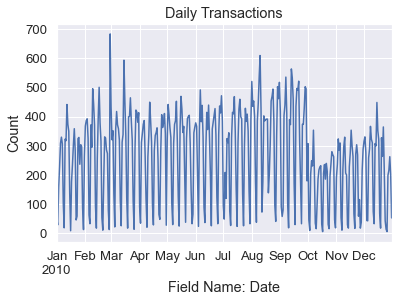

In [14]:
daily_applications.plot(title = 'Daily Transactions')
plt.xlabel("Field Name: Date")
plt.ylabel("Count")

In [15]:
weekly_applications = card_transactions_data.set_index(card_transactions_data['Date']).resample(dt.timedelta(days = 7)).count().iloc[:-1,0]
# weekly_applications

Text(0, 0.5, 'Count')

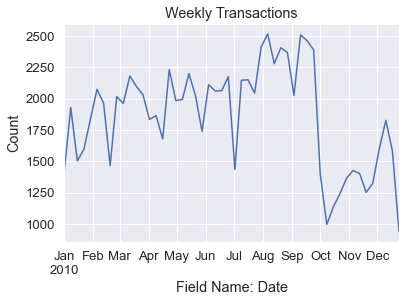

In [17]:
weekly_applications.plot(title = 'Weekly Transactions')
plt.xlabel("Field Name: Date")
plt.ylabel("Count")

Text(0.5, 0, 'Field Name: Amount')

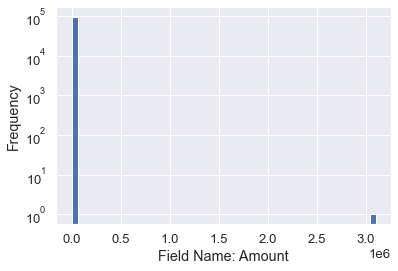

In [34]:
card_transactions_data['Amount'].plot(kind = 'hist', bins=50)
plt.yscale('log')
plt.xlabel("Field Name: Amount")

Text(0.5, 0, 'Field Name: Amount')

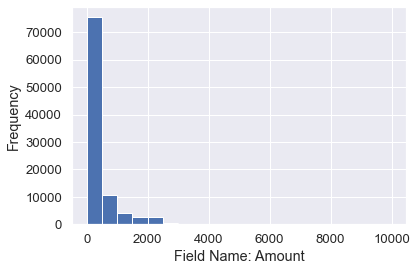

In [51]:
card_transactions_data[card_transactions_data['Amount']<=10000]['Amount'].plot(kind = 'hist', bins=20)
plt.xlabel("Field Name: Amount")

<AxesSubplot:ylabel='Frequency'>

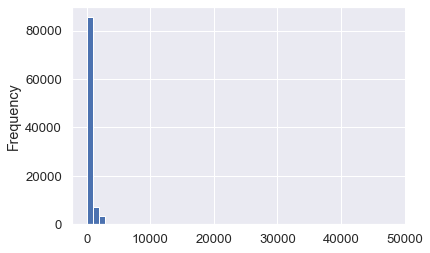

In [43]:
card_transactions_data['Amount'].sort_values(ascending=False)[1:].plot(kind = 'hist', bins=50)

Text(0, 0.5, 'Count')

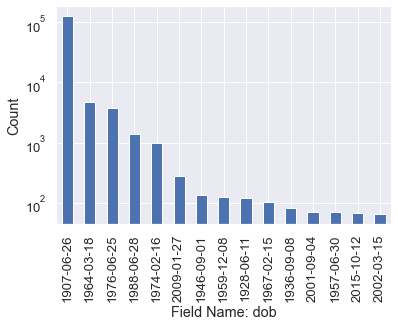

In [315]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots()
card_transactions_data['dob'].astype(str).value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('Field Name: dob')
plt.ylabel('Count')

In [311]:
card_transactions_data['dob'].value_counts()

1907-06-26    126568
1964-03-18      4818
1976-06-25      3723
1988-06-28      1404
1974-02-16       980
               ...  
1928-07-30         5
1986-03-13         5
1919-02-23         5
1944-11-27         5
1996-09-04         5
Name: dob, Length: 42673, dtype: int64

In [296]:
plt.gca?

In [287]:
(card_transactions_data['dob']=="1907-06-26").sum() / len(card_transactions_data['dob'])

0.126568

In [259]:
daily_dob = card_transactions_data.set_index(card_transactions_data['dob']).resample(dt.timedelta(days = 1)).count().iloc[:,0]

In [266]:
daily_dob.sort_values(ascending=False)

dob
1907-06-26    126568
1964-03-18      4818
1976-06-25      3723
1988-06-28      1404
1974-02-16       980
               ...  
1977-10-23         5
1933-07-05         5
1947-05-12         5
1931-09-21         5
1996-09-04         5
Name: record, Length: 42673, dtype: int64

In [269]:
# daily_dob_pop = daily_dob.loc[~daily_dob.index.isin(["1907-06-26"])]
daily_dob_pop = daily_dob.sort_values(ascending=False)[5:]
daily_dob_pop

dob
2009-01-27    280
1946-09-01    135
1959-12-08    126
1928-06-11    120
1967-02-15    102
             ... 
1977-10-23      5
1933-07-05      5
1947-05-12      5
1931-09-21      5
1996-09-04      5
Name: record, Length: 42668, dtype: int64

Text(0, 0.5, 'Count')

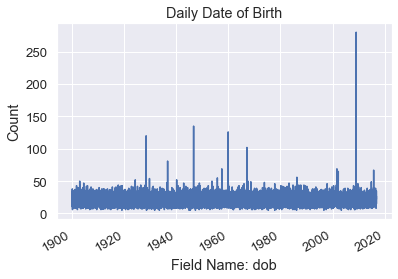

In [270]:
daily_dob_pop.plot(title = 'Daily Date of Birth')
plt.xlabel("Field Name: dob")
plt.ylabel("Count")